<a href="https://colab.research.google.com/github/Kulkarni-mohit/Course_Recommendation_System/blob/main/Course_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [ ]:
course_details = pd.read_csv("/content/course_details.csv")
user_activity = pd.read_csv("/content/user_activity.csv")

In [ ]:
course_details.head()

,course_id,course_name,course_category
0,1,Machine Learning Fundamentals,Data Science
1,2,Python for Beginners,Programming
2,3,Artificial Intelligence in Business,Business
3,4,Web Development Masterclass,Programming
4,5,Data Analysis with Pandas and NumPy,Data Science


In [ ]:
course_details.shape

(30, 3)

In [ ]:
user_activity.head()

,user_id,course_id,time_spent,views,completed,quiz_score,rating
0,1,16,6,28,1,90,5
1,1,5,7,32,0,68,3
2,1,10,5,24,1,85,4
3,1,23,4,18,0,72,3
4,2,19,7,30,1,88,4


In [ ]:
user_activity.shape

(400, 7)

## EDA

In [ ]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     400 non-null    int64
 1   course_id   400 non-null    int64
 2   time_spent  400 non-null    int64
 3   views       400 non-null    int64
 4   completed   400 non-null    int64
 5   quiz_score  400 non-null    int64
 6   rating      400 non-null    int64
dtypes: int64(7)
memory usage: 22.0 KB


In [ ]:
course_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   course_id        30 non-null     int64 
 1   course_name      30 non-null     object
 2   course_category  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [ ]:
course_details.groupby('course_category').count()

,course_id,course_name
course_category,,
Art,5,5
Business,4,4
Data Science,5,5
Design,1,1
Finance,1,1
Marketing,3,3
Programming,7,7
Psychology,1,1
Science,1,1


## Inferences
* user_activity contains all int values
* no null values
* in course_details, course_caterory is categorical variable. need to vectorize it
* course name and course id represent same thing

In [ ]:
user_activity.describe()

,user_id,course_id,time_spent,views,completed,quiz_score,rating
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.50000,15.435000,5.727500,27.195000,0.500000,77.930000,3.635000
std,28.90222,8.671723,1.590461,7.571015,0.500626,11.330757,0.948168
min,1.00000,1.000000,3.000000,15.000000,0.000000,58.000000,2.000000
25%,25.75000,8.000000,4.000000,20.000000,0.000000,68.000000,3.000000
50%,50.50000,15.000000,6.000000,28.000000,0.500000,78.000000,4.000000
75%,75.25000,23.000000,7.000000,32.000000,1.000000,88.000000,4.000000
max,100.00000,30.000000,8.000000,40.000000,1.000000,95.000000,5.000000


In [ ]:
# course_details = course_details.copy().drop(['course_name'], axis = 1)

In [ ]:
course_details.head()

,course_id,course_name,course_category
0,1,Machine Learning Fundamentals,Data Science
1,2,Python for Beginners,Programming
2,3,Artificial Intelligence in Business,Business
3,4,Web Development Masterclass,Programming
4,5,Data Analysis with Pandas and NumPy,Data Science


In [ ]:
df = pd.merge(course_details, user_activity, on = 'course_id')

In [ ]:
df.head()

,course_id,course_name,course_category,user_id,time_spent,views,completed,quiz_score,rating
0,1,Machine Learning Fundamentals,Data Science,6,5,22,1,80,4
1,1,Machine Learning Fundamentals,Data Science,13,5,22,1,80,4
2,1,Machine Learning Fundamentals,Data Science,21,5,22,1,80,4
3,1,Machine Learning Fundamentals,Data Science,28,5,22,1,80,4
4,1,Machine Learning Fundamentals,Data Science,36,5,22,1,80,4


In [ ]:
df.shape

(400, 9)

In [ ]:
# prompt: Using dataframe df: handle categorical variable course_category by numbering 0,1,2,3... also do inplace=true

df['course_category'] = df['course_category'].astype('category').cat.codes


<ipython-input-55-fa37bdc3d8b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

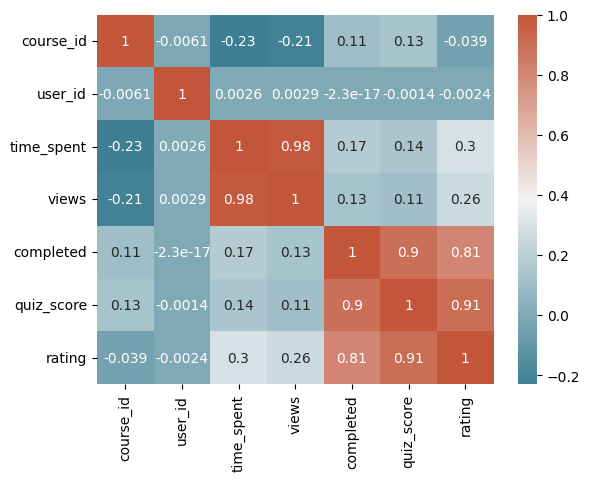

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

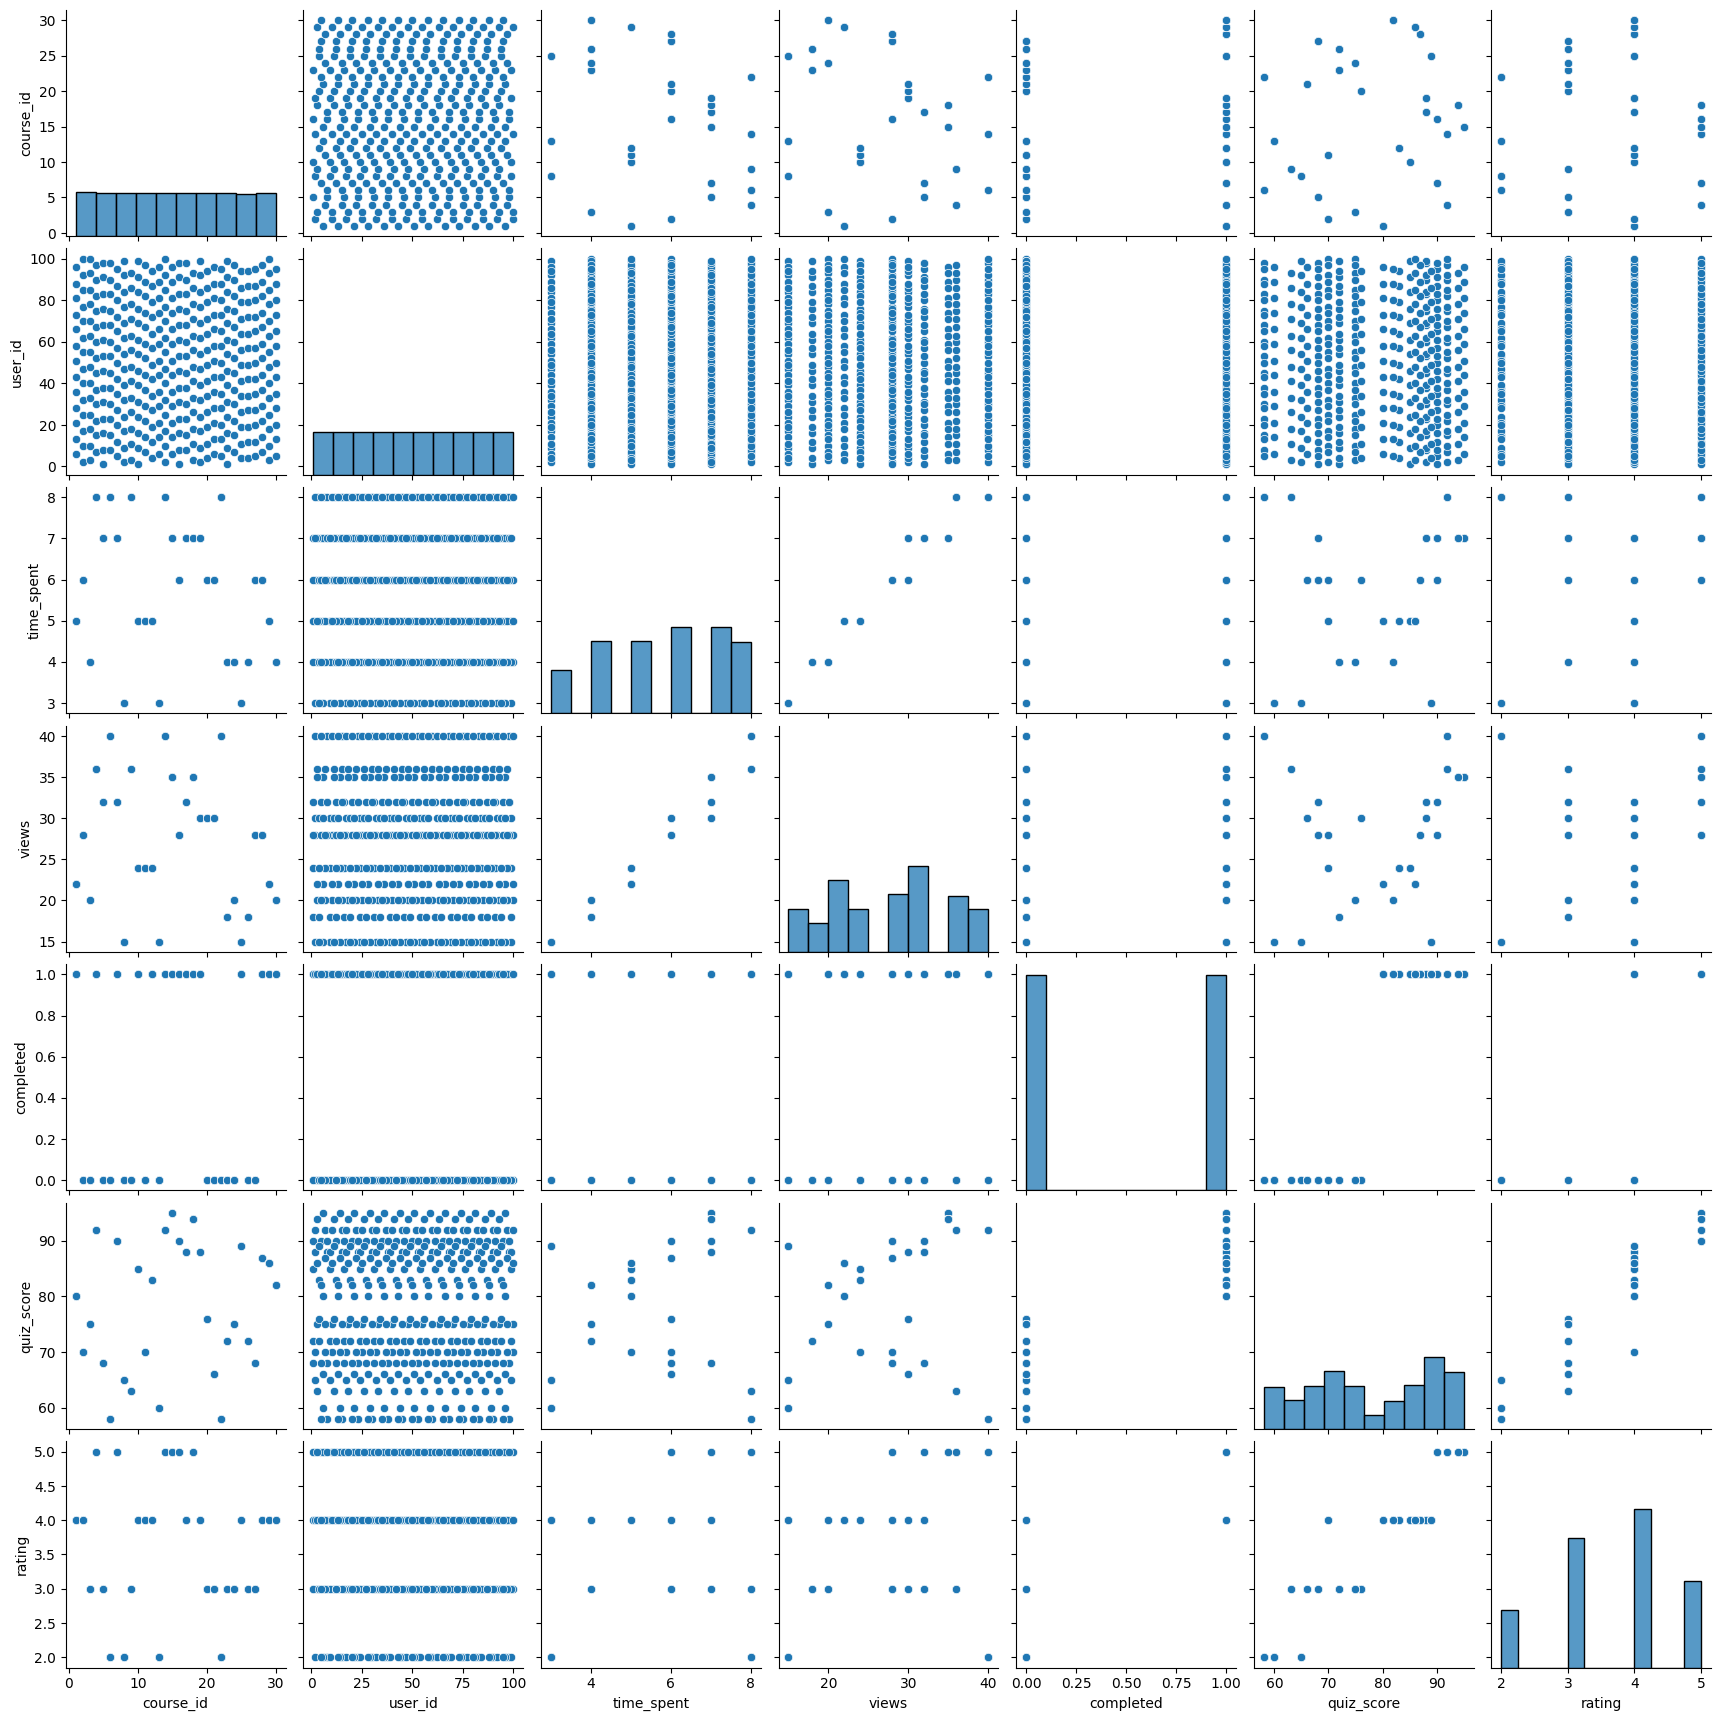

In [ ]:
sns.pairplot(df)

In [ ]:
df.groupby('course_name').sum()['views'].reset_index().sort_values('views', ascending = False)

<ipython-input-76-32802ef3b237>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('course_name').sum()['views'].reset_index().sort_values('views', ascending = False)


,course_name,views
22,Mobile App Development with React Native,560
23,Photography Basics,520
18,Java Programming Mastery,520
12,Graphic Design Essentials,468
29,Web Development Masterclass,468
11,Game Development with Unity,455
27,The Art of Storytelling in Film,455
5,Data Analysis with Pandas and NumPy,448
16,Introduction to Marketing,420
9,Financial Planning and Budgeting,416


# Trending Courses

In [ ]:
trending = df.groupby('course_name').mean()['rating'].reset_index()
no_rating = df.groupby('course_name').sum()['rating','views'].reset_index()
trending.rename(columns = {'rating': 'avg_rating'},inplace=True)

In [ ]:
no_rating

,course_name,rating
0,Advanced Excel Techniques,52
1,Agile Project Management,52
2,Applied Statistics for Data Science,52
3,Artificial Intelligence in Business,42
4,Creative Writing Workshop,39
5,Data Analysis with Pandas and NumPy,42
6,Deep Learning Fundamentals,39
7,Digital Marketing Strategies,39
8,Entrepreneurship Essentials,42
9,Financial Planning and Budgeting,65


In [ ]:
trending = pd.merge(trending, no_rating, on = 'course_name')

In [ ]:
trending.sort_values('avg_rating', ascending = False)

,course_name,avg_rating,rating
29,Web Development Masterclass,5.0,65
27,The Art of Storytelling in Film,5.0,65
26,Stock Market Investing Strategies,5.0,70
22,Mobile App Development with React Native,5.0,70
9,Financial Planning and Budgeting,5.0,65
11,Game Development with Unity,5.0,65
14,Introduction to Astronomy,4.0,52
25,Social Media Marketing Mastery,4.0,56
24,Python for Beginners,4.0,56
21,Machine Learning with TensorFlow,4.0,52


## Collaborative Filtering

In [ ]:
pt = df.pivot_table(index= 'course_name', columns = 'user_id', values = 'rating')

In [ ]:
pt

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
course_name,,,,,,,,,,,,,,,,,,,,,
Advanced Excel Techniques,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Agile Project Management,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Applied Statistics for Data Science,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Artificial Intelligence in Business,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Creative Writing Workshop,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Data Analysis with Pandas and NumPy,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Deep Learning Fundamentals,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
Digital Marketing Strategies,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
Entrepreneurship Essentials,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [ ]:
pt.fillna(0, inplace = True)

In [ ]:
pt

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
course_name,,,,,,,,,,,,,,,,,,,,,
Advanced Excel Techniques,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Agile Project Management,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Applied Statistics for Data Science,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Artificial Intelligence in Business,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Creative Writing Workshop,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Data Analysis with Pandas and NumPy,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
Deep Learning Fundamentals,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Digital Marketing Strategies,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Entrepreneurship Essentials,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(pt)

In [ ]:
similarity

array([[1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46153846, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46153846, 0.53846154, 0.53846154],
       [1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46153846, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.46153846, 0.53846154, 0.53846154],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.53846154, 0.        , 0.        ,
        0.        , 0.46153846, 0.46153846, 1.

In [ ]:
def recommend(course):
  index = np.where(pt.index == course)[0][0]
  similar_items = sorted(list(enumerate(similarity[0])), key = lambda x:x[1], reverse=True)[1:6]
  print(similar_items)
  for i in similar_items:
    print(pt.index[i[0]])

In [ ]:
recommend('Artificial Intelligence in Business')

[(1, 1.0000000000000004), (29, 0.5384615384615385), (28, 0.5384615384615384), (17, 0.46153846153846156), (27, 0.46153846153846156)]
Agile Project Management
Web Development Masterclass
UX/UI Design Principles
Introduction to Psychology
The Art of Storytelling in Film


# k-means Clustering (Couldn't Complete due to limited time)

In [ ]:
df['course_category'] = df['course_category'].astype('category').cat.codes

In [ ]:
df = df.copy().drop(['course_name'], axis = 1)

In [ ]:
df

,course_id,course_category,user_id,time_spent,views,completed,quiz_score,rating
0,1,2,6,5,22,1,80,4
1,1,2,13,5,22,1,80,4
2,1,2,21,5,22,1,80,4
3,1,2,28,5,22,1,80,4
4,1,2,36,5,22,1,80,4
...,...,...,...,...,...,...,...,...
395,30,8,65,4,20,1,82,4
396,30,8,73,4,20,1,82,4
397,30,8,80,4,20,1,82,4
398,30,8,88,4,20,1,82,4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

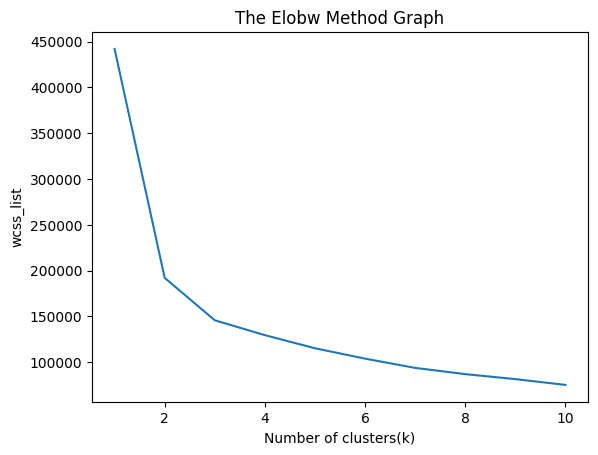

In [ ]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(df)
df['cluster_label'] = y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,course_id,course_category,user_id,time_spent,views,completed,quiz_score,rating,cluster_label
0,1,2,6,5,22,1,80,4,6
1,1,2,13,5,22,1,80,4,6
2,1,2,21,5,22,1,80,4,6
3,1,2,28,5,22,1,80,4,1
4,1,2,36,5,22,1,80,4,1
...,...,...,...,...,...,...,...,...,...
395,30,8,65,4,20,1,82,4,5
396,30,8,73,4,20,1,82,4,0
397,30,8,80,4,20,1,82,4,0
398,30,8,88,4,20,1,82,4,0


In [ ]:
def recommend_course(course_id, course_category, user_id, time_spent, views, completed, quiz_score, rating):
  # Create a dataframe with the given data
  df = pd.DataFrame({
      'course_id': [course_id],
      'course_category': [course_category],
      'user_id': [user_id],
      'time_spent': [time_spent],
      'views': [views],
      'completed': [completed],
      'quiz_score': [quiz_score],
      'rating': [rating]
  })

  # Convert the categorical variable to numerical
  # df['course_category'] = df['course_category'].astype('category').cat.codes

  # Drop the course name column
  # df = df.copy().drop(['course_name'], axis=1)

  # Perform k-means clustering
  # kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
  # kmeans.fit(df)

  # Get the cluster label for the given data
  cluster_label_ = kmeans.predict(df)
  print(cluster_label_)
  print(df['cluster_label'] == cluster_label_[0])
  # Get the 5 nearest points in the cluster
  similar_points = df[df['cluster_label'] == cluster_label[0]].sort_values('distance_to_centroid', ascending=True).head(5)

  # Return the course ids of the similar points
  return similar_points['course_id'].values


In [ ]:
recommend_course(1,2,6,5,22,1,80,4)

[1]


KeyError: 'cluster_label'

,course_id,course_category,user_id,time_spent,views,completed,quiz_score,rating,cluster_label
191,15,0,29,7,35,1,95,5,1
174,14,6,2,8,40,1,92,5,1
82,7,1,12,7,32,1,90,5,1
83,7,1,20,7,32,1,90,5,1
84,7,1,27,7,32,1,90,5,1
...,...,...,...,...,...,...,...,...,...
281,22,6,5,8,40,0,58,2,1
282,22,6,13,8,40,0,58,2,1
283,22,6,20,8,40,0,58,2,1
284,22,6,28,8,40,0,58,2,1


In [ ]:
# from sklearn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the user activity dataset
user_activity_data = pd.read_csv('/content/user_activity.csv')

# Define the Reader
# reader = Reader(rating_scale=(0, 5))

# Load the dataset into Surprise's Dataset format
data = user_activity_data[['user_id', 'course_id', 'rating']]

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

def cosine_similarity_kmeans(m, num_clusters=4):
    kmeans = KMeans(num_clusters,n_init=3,max_iter=1000)
    kmeans.fit(m)
    labels = kmeans.labels_
    sims = []
    for cluster_id in range(num_clusters):
        cluster_rows = m[labels==cluster_id]
        if cluster_rows.shape[0]< 10:
            display(f"WARNING: small cluster with only {cluster_rows.shape[0]} rows")
        sim = cosine_similarity(cluster_rows, cluster_rows, dense_output=False)
        sims.append(sim)
    return sims, kmeans

# Train the algorithm on the training set
sims, kmeans = cosine_similarity_kmeans(trainset)

# Make predictions on the test set
# predictions = kmeans.predict(testset)

# Evaluate the model's performance
# accuracy_score(predictions)
# accuracy_score(predictions)

# Function to get course recommendations for a user
def get_recommendations(user_id):
    # Get all course IDs
    all_course_ids = user_activity_data['course_id'].unique()

    # Predict ratings for courses the user hasn't rated
    unrated_courses = [(user_id, course_id, 0) for course_id in all_course_ids if course_id not in user_activity_data[user_activity_data['user_id'] == user_id]['course_id'].values]
    predictions = kmeans.predict(unrated_courses)

    # Get the top N recommendations
    top_n = sorted(predictions, reverse=True)[:5]

    # Return the recommended course IDs
    recommended_course_ids = [prediction.id for prediction in top_n]
    return recommended_course_ids

# Example: Get recommendations for user with ID 1
user_id_to_recommend = 1
recommendations = get_recommendations(user_id_to_recommend)
print(f"Recommendations for User {user_id_to_recommend}: {recommendations}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


AttributeError: 'numpy.int32' object has no attribute 'id'